In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset=pd.read_csv("scores_data_updated.csv")


In [2]:
dataset.shape

(149, 3)

In [3]:
dataset.head()

,Batch,User_ID,Score
0,AI_IGNITE_7,uid_149,6 / 7
1,AI_IGNITE_7,uid_148,6 / 7
2,AI_IGNITE_7,uid_147,7 / 7
3,AI_IGNITE_7,uid_146,7 / 7
4,AI_IGNITE_7,uid_145,4 / 7


In [4]:
dataset.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [5]:
dataset.columns=[column.strip() for column in list(dataset.columns)]
dataset.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [6]:
dataset.head(2)

,Batch,User_ID,Score
0,AI_IGNITE_7,uid_149,6 / 7
1,AI_IGNITE_7,uid_148,6 / 7


In [7]:
dataset["Batch"].unique()

array(['AI_IGNITE_7', 'AI_IGNITE_6', 'AI_IGNITE_4'], dtype=object)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
Batch      149 non-null object
User_ID    149 non-null object
Score      149 non-null object
dtypes: object(3)
memory usage: 3.6+ KB


All the 3 columns are of same type(Object) and 0 null values are present.

In [9]:
def replacer(value):
    s=value.replace(" / 7",'')
    s=int(s)
    return s

In [10]:
dataset["Score"]=dataset["Score"].apply(replacer)

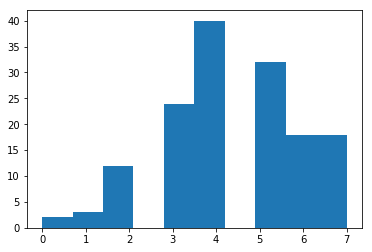

In [11]:
plt.hist(dataset["Score"])
plt.show()

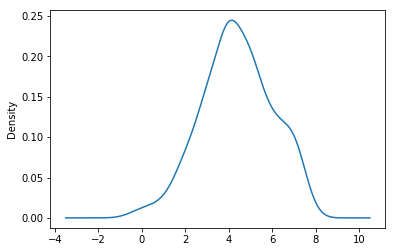

In [12]:
dataset["Score"].plot(kind='kde')
plt.show()

Observation: Score column is normally distributed

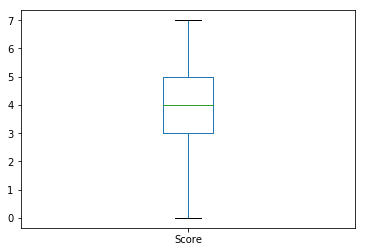

In [13]:
dataset['Score'].plot(kind='box')

Observation : There are not outliers in the score column

In [14]:
batches=dataset.groupby("Batch")
sum_batches=batches['Score'].aggregate(np.mean)
sum_batches

Batch
AI_IGNITE_4    3.791667
AI_IGNITE_6    4.229167
AI_IGNITE_7    5.056604
Name: Score, dtype: float64

Observation: AI_IGNITE_7 is doing greater compared to other batches, as Average is more for AI_IGNITE_7.

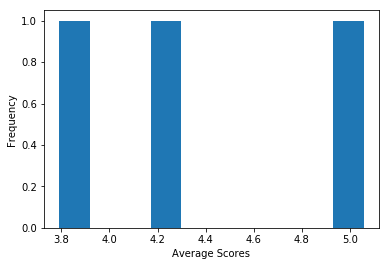

In [15]:
plt.hist(sum_batches)
plt.xlabel("Average Scores")
plt.ylabel("Frequency")
plt.show()

In [16]:
dataset['User_ID'].nunique()

149

Observation: All users are unique

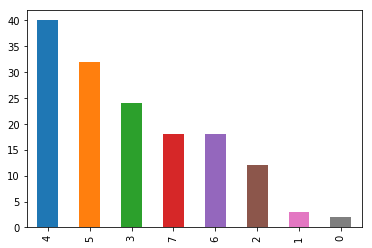

In [17]:
dataset["Score"].value_counts().plot(kind='bar')

Observation: 4 is the most repeated score

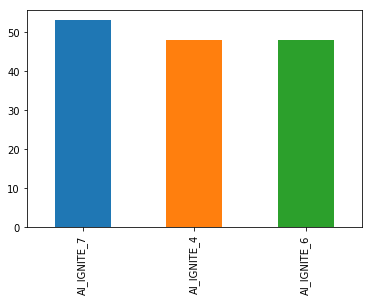

In [18]:
dataset["Batch"].value_counts().plot(kind='bar')


Observation: AI_IGNITE_7 are more in number compared to other batches.

In [19]:
dataset.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

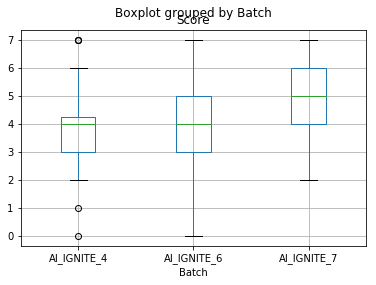

In [20]:
dataset.boxplot(by='Batch',column='Score')

Obseravation: There are outliers in the AI_IGNITE_4 batch